In [2]:
from load_and_reduce import load_and_reduce
from sklearn.metrics import r2_score

import numpy as np

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

#load data
intake_path = "Austin_Animal_Center_Intakes.csv"
outcome_path = "Austin_Animal_Center_Outcomes.csv"

X, y = load_and_reduce(intake_path, outcome_path, coding = "label", scale = True, DimRed = "None")

X.head()

,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Breed,Color,Outcome Type,Sex upon Outcome,Age (Days)
0,4,5,1,3,501,544,6,3,1.638629
1,4,5,0,4,1103,357,8,4,-0.702351
2,4,5,0,4,1103,357,8,4,-0.702351
3,4,5,0,4,1103,357,8,4,-0.702351
4,4,3,1,0,1836,122,3,0,0.297251


### Age is an ordinal variable

In [32]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score

In [4]:
X['Age (Days)'].head()

0    1.638629
1   -0.702351
2   -0.702351
3   -0.702351
4    0.297251
Name: Age (Days), dtype: float64

In [5]:
y

0         0.325000
1         0.090972
2         0.087500
3         0.090972
4         0.277778
            ...   
103670    0.050694
103671    0.050694
103672    0.050694
103673    0.050000
103675    0.063889
Name: time_in_shelter_days, Length: 103049, dtype: float64

In [6]:
df = pd.concat([X['Age (Days)'], y], join = 'outer', axis = 1)
df.head()

,Age (Days),time_in_shelter_days
0,1.638629,0.325000
1,-0.702351,0.090972
2,-0.702351,0.087500
3,-0.702351,0.090972
4,0.297251,0.277778


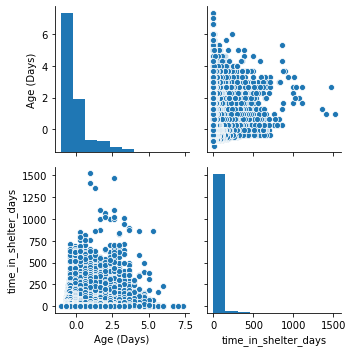

In [7]:
columns = ['Age (Days)', 'time_in_shelter_days']
sns.pairplot(df[columns], )
plt.tight_layout()
plt.show()

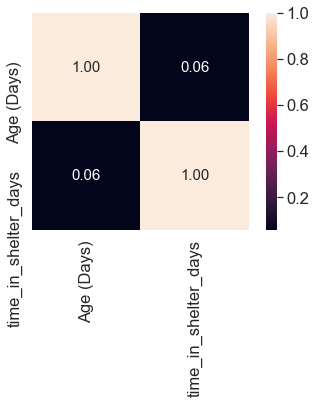

In [8]:
cm = np.corrcoef( df[columns].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=columns, xticklabels=columns)

plt.show()

In [28]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
LinReg = LinearRegression()

LinReg.fit( np.array(df['Age (Days)']).reshape(-1,1), np.array(y) )

y_pred = LinReg.predict(np.array(df['Age (Days)']).reshape(-1,1))

#type(np.array(df['Age (Days)']).reshape(-1,1))
#np.array(df['Age (Days)']).reshape(-1,1).shape

(103049, 1)

No handles with labels found to put in legend.


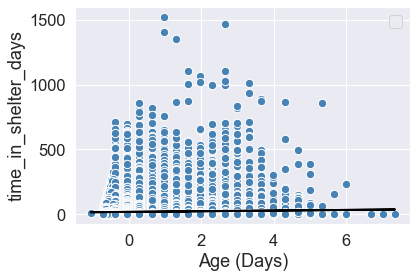

In [31]:
#lin_regplot(X, y, slr)
plt.scatter(np.array(df['Age (Days)']).reshape(-1,1), y, color='steelblue', edgecolor='white', s=70)
plt.plot(np.array(df['Age (Days)']).reshape(-1,1) , y_pred, color='black', lw=2)

plt.xlabel(columns[0])
plt.ylabel(columns[1])

plt.legend(loc='best')
plt.show()

In [33]:
r2_score(y, y_pred)

0.0031745657977156894